In [1]:
import pandas as pd
import numpy as np
import string
import lightgbm as lgb

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



from utilidades.graficar import ver_dispersion
from utilidades.reducir_uso_memoria import reduce_mem_usage

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"
ruta_submits = "../submits"
ruta_features = ruta_data + "/features/"

In [4]:
def to_ascii(s):
    car_ascii = set(string.printable)
    return "".join([a for a in s if a in car_ascii])

train_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/train_limpio.csv"))
test_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/test_limpio.csv"))

train_limpio = train_limpio.drop(["dia"], axis=1)
test_limpio = test_limpio.drop(["dia"], axis=1)

poblacion_train = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_train.csv")
poblacion_test = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_test.csv")

train_limpio["poblacion"] = poblacion_train
test_limpio["poblacion"] = poblacion_test

train_limpio = train_limpio.rename(columns={col: to_ascii(col) for col in train_limpio.columns})
test_limpio = test_limpio.rename(columns={col: to_ascii(col) for col in test_limpio.columns})

id_zona_train = pd.read_csv(f"{ruta_data}/id_zona_train.csv")
id_zona_test = pd.read_csv(f"{ruta_data}/id_zona_test.csv")

train_limpio["idzona"] = id_zona_train["idzona"]
test_limpio["idzona"] = id_zona_test["idzona"]

In [5]:
tiene_terraza = pd.read_csv(f"{ruta_data}/features/tiene_terraza_train.csv")

train_limpio["tiene_terraza"] = tiene_terraza

tiene_terraza_tes = pd.read_csv(f"{ruta_data}/features/tiene_terraza_test.csv")

test_limpio["tiene_terraza"] = tiene_terraza_tes

tiene_jardin = pd.read_csv(f"{ruta_data}/features/tiene_jardin_train.csv")

train_limpio["tiene_jardin"] = tiene_jardin

tiene_jardin_tes = pd.read_csv(f"{ruta_data}/features/tiene_jardin_test.csv")

test_limpio["tiene_jardin"] = tiene_jardin_tes

tiene_servicio = pd.read_csv(f"{ruta_data}/features/tiene_servicio_train.csv")

train_limpio["tiene_servicio"] = tiene_servicio

tiene_servicio_tes = pd.read_csv(f"{ruta_data}/features/tiene_servicio_test.csv")

test_limpio["tiene_servicio"] = tiene_servicio_tes

tiene_vestidor = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_train.csv")

train_limpio["tiene_vestidor"] = tiene_vestidor

tiene_vestidor_tes = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_test.csv")

test_limpio["tiene_vestidor"] = tiene_vestidor_tes

tiene_vista = pd.read_csv(f"{ruta_data}/features/tiene_vista_train.csv")

train_limpio["tiene_vista"] = tiene_vista

tiene_vista_tes = pd.read_csv(f"{ruta_data}/features/tiene_vista_test.csv")

test_limpio["tiene_vista"] = tiene_vista_tes

tiene_salon = pd.read_csv(f"{ruta_data}/features/tiene_salon_train.csv")

train_limpio["tiene_salon"] = tiene_salon

tiene_salon_tes = pd.read_csv(f"{ruta_data}/features/tiene_salon_test.csv")

test_limpio["tiene_salon"] = tiene_salon_tes

tiene_cuarto = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_train.csv")

train_limpio["tiene_cuarto"] = tiene_cuarto

tiene_cuarto_tes = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_test.csv")

test_limpio["tiene_cuarto"] = tiene_cuarto_tes

tiene_family = pd.read_csv(f"{ruta_data}/features/tiene_family_train.csv")

train_limpio["tiene_family"] = tiene_family

tiene_family_tes = pd.read_csv(f"{ruta_data}/features/tiene_family_test.csv")

test_limpio["tiene_family"] = tiene_family_tes

tiene_bosque = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_train.csv")

train_limpio["bosque_dir"] = tiene_bosque

tiene_bosque_tes = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_test.csv")

test_limpio["bosque_dir"] = tiene_bosque_tes

tiene_avenida = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_train.csv")

train_limpio["avenida_dir"] = tiene_avenida

tiene_avenida_tes = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_test.csv")

test_limpio["avenida_dir"] = tiene_avenida_tes

tiene_fuente = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_train.csv")

train_limpio["fuente_dir"] = tiene_fuente

tiene_fuente_tes = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_test.csv")

test_limpio["fuente_dir"] = tiene_fuente_tes

#Empeoro

# tiene_vis = pd.read_csv(f"{ruta_data}/features/tiene_vista_dir_train.csv")

# train_limpio["vis_dir"] = tiene_vis

tiene_golf = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_train.csv")

train_limpio["golf_dir"] = tiene_golf

tiene_golf_tes = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_test.csv")

test_limpio["golf_dir"] = tiene_golf_tes

In [6]:
tiene_hectarea = pd.read_csv(f"{ruta_data}/features/tiene_hectarea_train.csv")

train_limpio["tiene_hectarea"] = tiene_hectarea

tiene_hectarea_tes = pd.read_csv(f"{ruta_data}/features/tiene_hectarea_test.csv")

test_limpio["tiene_hectarea"] = tiene_hectarea_tes

tiene_torre = pd.read_csv(f"{ruta_data}/features/tiene_torre_train.csv")

train_limpio["tiene_torre"] = tiene_torre

tiene_torre_tes = pd.read_csv(f"{ruta_data}/features/tiene_torre_test.csv")

test_limpio["tiene_torre"] = tiene_torre_tes

In [7]:
score_tf_train = pd.read_csv(f"{ruta_data}/features/scores_tfidf_train.csv")

train_limpio["score_tfidf"] = score_tf_train

In [8]:
score_tf_test = pd.read_csv(f"{ruta_data}/features/scores_tfidf_test.csv")

test_limpio["score_tfidf"] = score_tf_test

In [11]:
def cuantil(x, cuantiles):
    for i in range(1,len(cuantiles)):
        if cuantiles[i-1] <= x <= cuantiles[i]:
            return i

In [12]:
cuantiles = []
for elem in np.linspace(0,100, 51):
    cuantiles.append(train_limpio["precio"].quantile(q=elem/100))

In [13]:
n_cuantil = train_limpio["precio"].apply(lambda x: cuantil(x, cuantiles))

In [14]:
train_limpio["cuantiles"] = n_cuantil

In [13]:
#train_limpio.to_csv(f"{ruta_data}/train_nn.csv", index=False)

In [15]:
X, y = train_limpio.drop(["precio", "cuantiles"], axis=1),train_limpio["cuantiles"]

In [14]:
#scaler = StandardScaler()

In [15]:
#X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=96969)

In [17]:
X_train_cls, X_train_reg, y_train_cls, y_train_reg = train_test_split(X_train, y_train, test_size=0.20, random_state=96969)

In [18]:
y_test = y_test.drop("cuantiles",axis=1)

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [18]:
#y_train_cls = y_train_cls.drop("precio", axis=1)

In [19]:
#y_train_reg = y_train_reg.drop("cuantiles", axis=1)

In [73]:
X_train_reg.drop(["precio1", "precio2"], inplace=True, axis=1)

/home/julian/.local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
def cuadrado(arr):
    return [1/((x**2)+0.0001) for x in arr]

In [37]:
X_train_reg.drop("cuantil", axis=1, inplace=True)

/home/julian/.local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
reg = KNeighborsClassifier(p=1,n_neighbors=5, weights=cuadrado)

In [39]:
%%time
#y_train_cls_l = np.log(y_train_cls)
reg.fit(X_train_cls, y_train_cls)
pred1 = reg.predict(X_train_reg)
#pred1 = np.exp(pred1)

CPU times: user 10.3 s, sys: 121 ms, total: 10.4 s
Wall time: 10.5 s


In [42]:
pd.DataFrame(pred1, columns=["cuantil"]).to_csv(f"{ruta_data}/cuantiles.csv", index=False)

In [77]:
#reg = KNeighborsClassifier(p=1,n_neighbors=5, weights=cuadrado)

In [78]:
reg = RandomForestRegressor(n_estimators=100)

In [79]:
%%time
y_train_cls_l = np.log(y_train_cls)
reg.fit(X_train_cls, y_train_cls_l)

pred2 = reg.predict(X_train_reg)
pred2 = np.exp(pred2)

CPU times: user 4min 30s, sys: 809 ms, total: 4min 31s
Wall time: 4min 38s


In [119]:
#accuracy_score(y_test, pred) # 0.2466 con dist cuad

0.18745833333333334

In [120]:
#mean_absolute_error(y_test, pred)

4.886541666666667

In [24]:
X_train_reg.loc[:,"cuantil"] = pred1

/home/julian/.local/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/julian/.local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [81]:
X_train_reg.loc[:,"precio2"] = pred2

---

In [27]:
%%time
# y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train_reg, label= y_train_reg)

params = {"reg_sqrt":True,
          "n_jobs":-1}

reg = lgb.train(params,d_train)
# pred = reg.predict(X_test)

CPU times: user 3.27 s, sys: 29.1 ms, total: 3.3 s
Wall time: 1.38 s


In [45]:
X_test.drop("cuantil", axis=1, inplace=True)

/home/julian/.local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
reg1 = KNeighborsClassifier(p=1,n_neighbors=5, weights=cuadrado)

#y_train_l = np.log(y_train)
reg1.fit(X_train, y_train)
pred1 = reg1.predict(X_test)
#pred1 = np.exp(pred1)

In [47]:
pd.DataFrame(pred1, columns=["cuantil"]).to_csv(f"{ruta_data}/cuantiles_test.csv", index=False)

In [89]:
X_test.drop(["precio1","precio2"],inplace=True, axis=1)

/home/julian/.local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
reg2 = RandomForestRegressor(n_estimators=100)

y_train_l = np.log(y_train)
reg2.fit(X_train, y_train_l)
pred2 = reg2.predict(X_test)
pred2 = np.exp(pred2)

In [31]:
X_test["cuantil"] = pred1
#X_test["precio2"] = pred2

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
pred = reg.predict(X_test)

In [33]:
mean_absolute_error(y_test, pred)

4.038768850047544

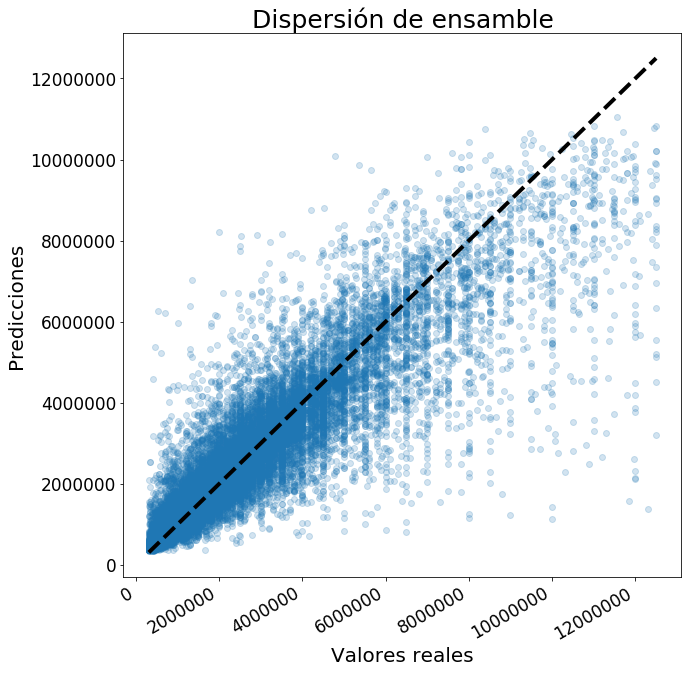

In [95]:
ver_dispersion(y_test,pred, "ensamble")

---

In [103]:
X_train_reg[["precio1", "precio2"]].to_csv(f"{ruta_data}/preds_train_reg.csv")

In [104]:
X_test[["precio1", "precio2"]].to_csv(f"{ruta_data}/preds_train.csv")

In [31]:
n_dimensiones = 300

In [32]:
desc_train = reduce_mem_usage(pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_train_{n_dimensiones}d.csv"))

In [ ]:
tit_train = reduce_mem_usage(pd.read_csv(f"{ruta_data}/features/titulos_vectorizados_train_50d.csv"))

In [103]:
desc_train = pd.DataFrame(data=scaler.fit_transform(desc_train), columns=desc_train.columns)

In [105]:
tit_train = pd.DataFrame(data=scaler.fit_transform(tit_train), columns=tit_train.columns)

In [106]:
train_lim_des = pd.concat([train_limpio, desc_train, tit_train], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_lim_des, n_cuantil, test_size=0.20, random_state=96969)

In [126]:
reg = MLPClassifier(alpha=0.005)

In [127]:
%%time
reg.fit(X_train_cls, y_train_cls)

/home/julian/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 5min 48s, sys: 4min 10s, total: 9min 58s
Wall time: 3min 2s


MLPClassifier(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [133]:
X_train_reg.shape

(43200, 87)

In [139]:
pred = reg.predict(X_train_reg)

In [97]:
accuracy_score(y_test, pred)

0.11010416666666667

In [98]:
pred

array([20, 25, 48, ..., 16,  8, 29])

In [ ]:
# 0.119 antes

In [101]:
pd.Series(pred)

0        20
1        25
2        48
3        43
4        15
         ..
47995    23
47996    35
47997    16
47998    8 
47999    29
Length: 48000, dtype: int64

In [102]:
y_test

162322    19
196536    34
79859     47
3147      46
127204    25
          ..
5763      4 
126288    37
15923     8 
231573    19
139850    34
Name: precio, Length: 48000, dtype: int64